1. Spam Data

    - Load the spam data set.
    - Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    - Is there any overlap in the bigrams for the spam data and the ham data?
    - Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.
2. Explore the blog articles using the techniques discussed in the exploration lesson.
3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import re
import unicodedata
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import env

import acquire
import prepare

from env import get_db_url

In [3]:
url = get_db_url('spam_db')
sql = "SELECT * FROM spam"
df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# def lemmatize(article: str):
#     """ Accepts string as argument, article, and returns text after applying lemmatization to each word """
    
#     wnl = nltk.stem.WordNetLemmatizer()
        
#     lemmas = [wnl.lemmatize(word) for word in article.split()]
#     article_lemmatized = ' '.join(lemmas)

#     return article_lemmatized

In [5]:
df['text_cleaned_lem'] = df.text.apply(prepare.lemmatize)

In [6]:
df.to_csv('lessons/spam.csv', index=False)

In [7]:
# combine all messages in single string by label

ham_words = prepare.lemmatize(prepare.basic_clean(' '.join(df[df.label == 'ham'].text))).split()
spam_words = prepare.lemmatize(prepare.basic_clean(' '.join(df[df.label == 'spam'].text))).split()
all_words = prepare.lemmatize(prepare.basic_clean(' '.join(df.text))).split()

In [8]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [9]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,ham,spam
',6,6,0
'',15,15,0
''ok'',5,5,0
'an,1,1,0
'anything',1,1,0


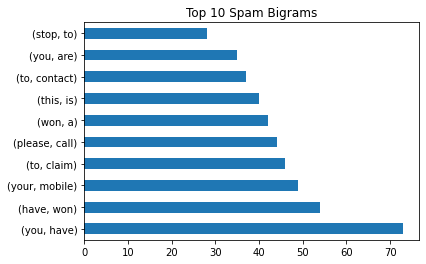

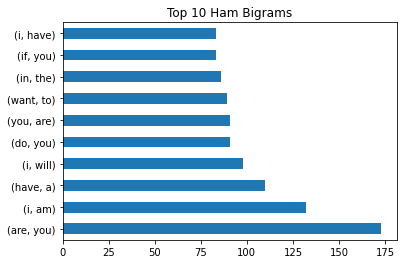

In [10]:
pd.Series(nltk.bigrams(spam_words)).value_counts().head(10).plot.barh()
plt.title("Top 10 Spam Bigrams")
plt.show()
pd.Series(nltk.bigrams(ham_words)).value_counts().head(10).plot.barh()
plt.title("Top 10 Ham Bigrams")
plt.show()

Text(0.5, 1.0, 'Ham')

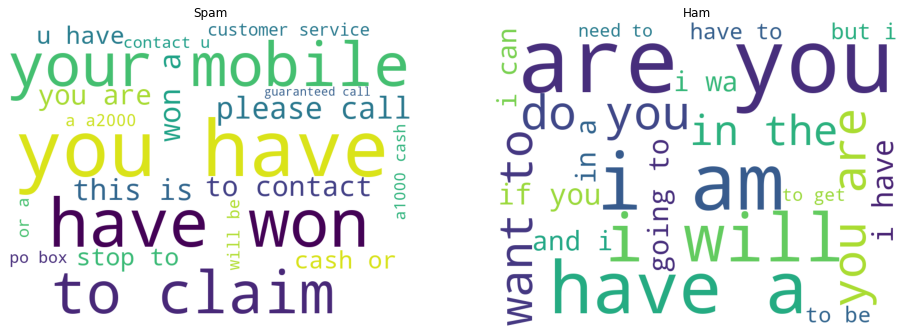

In [11]:
fig, ax = plt.subplots(1,2,figsize = (16,8))
for i, word_set in enumerate([spam_words, ham_words]):
    bigrams = {k[0] + ' ' + k[1]: v for k,v in pd.Series(nltk.bigrams(word_set)).value_counts().head(20).to_dict().items()}
    img = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(bigrams)
    ax[i].imshow(img)
    ax[i].axis('off')
ax[0].set_title("Spam")
ax[1].set_title("Ham")

In [12]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words)).value_counts()
ham_bigrams = pd.Series(nltk.bigrams(ham_words)).value_counts()
bigram_df = pd.DataFrame()
bigram_df['spam'] = spam_bigrams
bigram_df['ham'] = ham_bigrams
# bigram_df['spam_rank'] = pd.Series(nltk.bigrams(spam_words.split())).value_counts().rank(ascending=False)
# bigram_df['ham_rank'] = pd.Series(nltk.bigrams(ham_words.split())).value_counts().rank(ascending=False)

In [13]:
set(spam_bigrams.head(20).index).intersection(set(ham_bigrams.head(20).index))

{('you', 'are')}

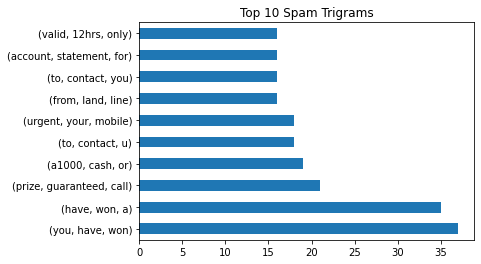

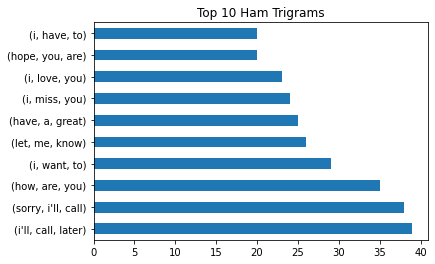

In [14]:
pd.Series(nltk.ngrams(spam_words,3)).value_counts().head(10).plot.barh()
plt.title("Top 10 Spam Trigrams")
plt.show()
pd.Series(nltk.ngrams(ham_words,3)).value_counts().head(10).plot.barh()
plt.title("Top 10 Ham Trigrams")
plt.show()

Text(0.5, 1.0, 'All')

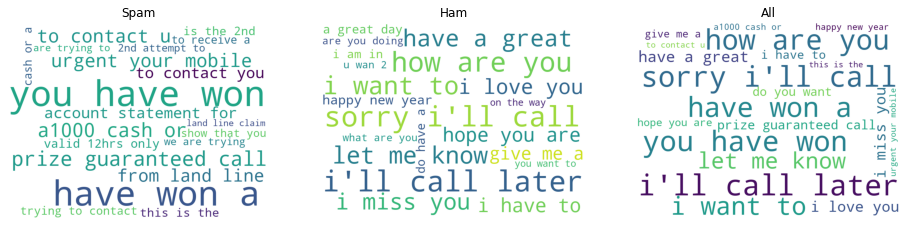

In [15]:
fig, ax = plt.subplots(1,3,figsize = (16,8))
for i, word_set in enumerate([spam_words, ham_words, all_words]):
    trigrams = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k,v in pd.Series(nltk.ngrams(word_set,3)).value_counts().head(20).to_dict().items()}
    img = WordCloud(background_color='white',width=800, height=600).generate_from_frequencies(trigrams)
    ax[i].imshow(img)
    ax[i].axis('off')
ax[0].set_title("Spam")
ax[1].set_title("Ham")
ax[2].set_title("All")

In [16]:
spam_trigrams = pd.Series(nltk.ngrams(spam_words,3)).value_counts()
ham_trigrams = pd.Series(nltk.ngrams(ham_words,3)).value_counts()

trigram_df = pd.DataFrame()
trigram_df['spam'] = spam_trigrams
trigram_df['ham'] = ham_trigrams

In [17]:
trigram_df.fillna(0).sort_values(by=['spam','ham'],ascending=False).head(20)

,spam,ham
"(you, have, won)",37,0.0
"(have, won, a)",35,0.0
"(prize, guaranteed, call)",21,0.0
"(a1000, cash, or)",19,0.0
"(to, contact, u)",18,0.0
"(urgent, your, mobile)",18,0.0
"(to, contact, you)",16,1.0
"(from, land, line)",16,0.0
"(account, statement, for)",16,0.0
"(valid, 12hrs, only)",16,0.0


In [18]:
set(spam_trigrams.head(20).index).intersection(set(ham_trigrams.head(20).index))

set()

#### No overlap in trigrams

In [19]:
set(spam_trigrams.head(100).index).intersection(set(ham_trigrams.head(100).index))

{('do', 'you', 'want')}

#### At top 100, you get overlap

## Blog Posts

- Explore the blog articles using the techniques discussed in the exploration lesson.

In [20]:
df = prepare.create_prepared_blog_df()

In [21]:
df.date_published = pd.to_datetime(df.date_published)

In [22]:
df.date_published.value_counts()

2022-05-16    2
2022-06-19    1
2022-05-17    1
2022-05-23    1
2022-05-31    1
2022-06-01    1
2022-06-05    1
2022-06-08    1
2022-08-12    1
2022-08-10    1
2022-07-06    1
2022-07-07    1
2022-07-14    1
2022-07-20    1
2022-07-25    1
2022-08-02    1
2022-06-20    1
Name: date_published, dtype: int64

In [23]:
# Old vs New
older = df[df.date_published<'2022-07-01']
newer = df[df.date_published>='2022-07-01']

In [24]:
all_articles = ' '.join(df.lemmatized)
new_articles = ' '.join(newer.lemmatized)
old_articles = ' '.join(older.lemmatized)

In [25]:
all_words = all_articles.split()
new_words = new_articles.split()
old_words = old_articles.split()

In [26]:
new_freq = pd.Series(new_words).value_counts()
old_freq = pd.Series(old_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [27]:
all_freq.head()

cloud      86
program    50
data       48
career     47
codeup     46
dtype: int64

In [28]:
word_counts = (pd.concat([all_freq, old_freq, new_freq], axis=1, sort=True)
                .set_axis(['all', 'old', 'new'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

In [29]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,old,new
cloud,86,49,37
program,50,19,31
data,48,17,31
career,47,31,16
codeup,46,23,23
salary,28,7,21
tech,25,14,11
science,25,13,12
administration,23,12,11
job,22,8,14


In [30]:
pd.concat([word_counts[word_counts.new == 0].sort_values(by='old').tail(6),
           word_counts[word_counts.old == 0].sort_values(by='new').tail(6)])

,all,old,new
first,10,10,0
health,10,10,0
mental,10,10,0
python,11,11,0
work,12,12,0
support,12,12,0
fullstack,7,0,7
duty,7,0,7
completing,7,0,7
analyst,10,0,10


Text(0.5, 1.0, 'Proportion of New vs Old for the 20 most common words')

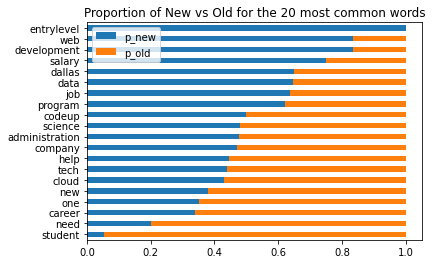

In [31]:
# figure out the percentage of old vs new
(word_counts
 .assign(p_new=word_counts.new / word_counts['all'],
         p_old=word_counts.old / word_counts['all'])
 .sort_values(by='all')
 [['p_new', 'p_old']]
 .tail(20)
 .sort_values('p_new')
 .plot.barh(stacked=True))

plt.title('Proportion of New vs Old for the 20 most common words')

Text(0.5, 1.0, 'New Articles')

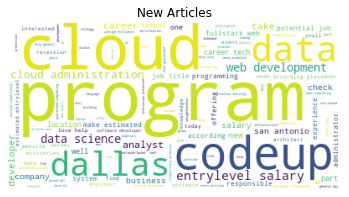

In [32]:
img = WordCloud(background_color='white').generate(new_articles)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
plt.title('New Articles')

Text(0.5, 1.0, 'Old Articles')

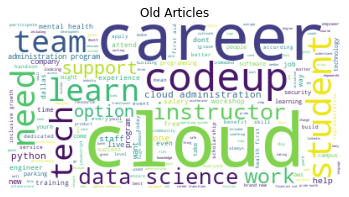

In [33]:
img = WordCloud(background_color='white').generate(old_articles)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
plt.title('Old Articles')

In [34]:
old_bigrams = nltk.ngrams(old_words, 2)
new_bigrams = nltk.ngrams(new_words, 2)

In [35]:
top_20_old_bigrams = (pd.Series(nltk.ngrams(old_words, 2))
                      .value_counts()
                      .head(20))
top_20_new_bigrams = (pd.Series(nltk.ngrams(new_words, 2))
                      .value_counts()
                      .head(20))

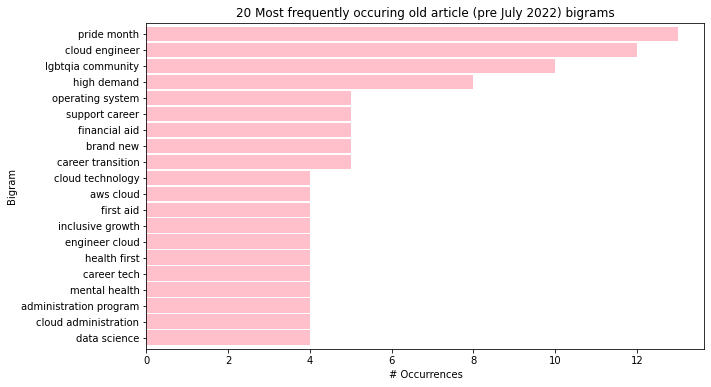

In [51]:
top_20_old_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring old article (pre July 2022) bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_old_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

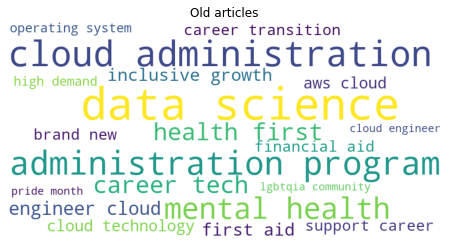

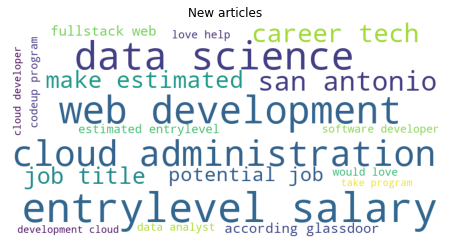

In [37]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_old_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Old articles')
plt.show()
data = {k[0] + ' ' + k[1]: v for k, v in top_20_new_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.title('New articles')
plt.show()

## News Exploration

In [38]:
# Added ', monday, and 'said' to stopwords as these are very frequently occuring but don't provide much context
df = prepare.create_prepared_news_df(extra_words=["'","said","monday"])

Importing from csv


In [39]:
df.head()

,title,author,datetime,category,original,clean,stemmed,lemmatized
0,India's GDP grows at 13.5% in first quarter of...,Anmol Sharma,2022-08-31T12:24:39.000Z,business,India's GDP grew at 13.5% in the first quarter...,india gdp grew 135 first quarter fy23 achievin...,india gdp grew 135 first quarter fy23 achiev f...,india gdp grew 135 first quarter fy23 achievin...
1,Musk seeks to delay Twitter trial to Nov amid ...,Ridham Gambhir,2022-08-31T03:16:29.000Z,business,Tesla CEO Elon Musk is seeking to delay the tr...,tesla ceo elon musk seeking delay trial twitte...,tesla ceo elon musk seek delay trial twitter n...,tesla ceo elon musk seeking delay trial twitte...
2,Musk cites whistleblower's claims in new notic...,Ridham Gambhir,2022-08-30T12:02:31.000Z,business,Tesla CEO Elon Musk's legal team has filed ano...,tesla ceo elon musk legal team filed another n...,tesla ceo elon musk legal team file anoth noti...,tesla ceo elon musk legal team filed another n...
3,2 top executives at Snap quit hours after repo...,Ridham Gambhir,2022-08-31T04:11:41.000Z,business,Two senior advertising executives at Snap quit...,two senior advertising executives snap quit ho...,two senior advertis execut snap quit hour repo...,two senior advertising executive snap quit hou...
4,Viral video shows Amazon parcels thrown out of...,Apaar Sharma,2022-08-31T08:21:25.000Z,business,A video from Guwahati railway station has gone...,video guwahati railway station gone viral show...,video guwahati railway station gone viral show...,video guwahati railway station gone viral show...


In [40]:
def generate_category_words(df, categorical = 'category'):
    """ Joins all words in each news article per category. Outputs dataframe with all_words by category."""
    
    category_words = {}
    
    # Get all words for lemmatized version of all articles in category
    for category in df[categorical].unique():
        sample = df[df[categorical] == category]
        cat_words = ' '.join(sample.lemmatized)
        
        category_words[category] = cat_words
        
    category_words['all'] = ' '.join(df.lemmatized)
        
    return pd.DataFrame(category_words, index = ['all_words']).T

In [41]:
all_words_df=generate_category_words(df)

def generate_word_count_df(all_words_df):
    
    
    all_words_df = pd.concat([all_words_df, all_words_df['all_words'].apply(lambda words: pd.Series(words.split()).value_counts())],axis=1)
    
    # Transpose and fill NaN with 0
    all_words_df = all_words_df.T.fillna(0)
    
    # Drop the all_words row
    all_words_df = all_words_df.drop(all_words_df.index[0])
        
    return all_words_df

In [42]:
all_words_df['all_words'].apply(lambda words: pd.Series(words.split()).value_counts())

,company,billion,first,india,million,report,net,investment,firm,bank,...,taking,tweeting,critic,reacted,mukherjee,villain,main,soon,lengthier,superpower
business,13.0,12.0,8.0,7.0,6.0,6.0,6.0,5.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sports,NaN,NaN,3.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
technology,8.0,10.0,1.0,4.0,8.0,8.0,1.0,4.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entertainment,NaN,NaN,4.0,NaN,NaN,3.0,NaN,1.0,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
all,21.0,22.0,16.0,31.0,14.0,17.0,7.0,10.0,12.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [43]:
word_counts = generate_word_count_df(all_words_df)
# word_counts = word_counts.fillna(0).drop(word_counts.index[0])

In [44]:
word_counts

,business,sports,technology,entertainment,all
company,13.0,0,8.0,0,21.0
billion,12.0,0,10.0,0,22.0
first,8.0,3.0,1.0,4.0,16.0
india,7.0,20.0,4.0,0,31.0
million,6.0,0,8.0,0,14.0
...,...,...,...,...,...
villain,0,0,0,1.0,1.0
main,0,0,0,1.0,1.0
soon,0,0,0,1.0,1.0
lengthier,0,0,0,1.0,1.0


In [45]:
word_counts.sort_values(by='all', ascending=False).head(10)

,business,sports,technology,entertainment,all
india,7.0,20.0,4.0,0,31.0
added,1.0,13.0,2.0,11.0,27.0
billion,12.0,0,10.0,0,22.0
company,13.0,0,8.0,0,21.0
report,6.0,0,8.0,3.0,17.0
stated,1.0,7.0,1.0,8.0,17.0
match,0,16.0,0,0,16.0
first,8.0,3.0,1.0,4.0,16.0
actress,0,0,0,16.0,16.0
team,2.0,9.0,3.0,1.0,15.0


In [46]:
unique_words = pd.DataFrame()
# Every category except all
for col in word_counts.columns[word_counts.columns != 'all']:
    # concatentate top 5 unique words for each category. 
    # Unique words determined by checking if the word count of the word is equal to the 'all' column value for that row
    unique_words = pd.concat([unique_words,
                              word_counts[word_counts.apply(lambda row: row[col] == row['all'], axis = 1)].sort_values(by=col).tail(5)])

In [47]:
# Display top 20
unique_words.head(5*4)

,business,sports,technology,entertainment,all
trillion,3.0,0,0,0,3.0
steel,4.0,0,0,0,4.0
marcopolo,4.0,0,0,0,4.0
tata,4.0,0,0,0,4.0
bank,5.0,0,0,0,5.0
playing,0,9.0,0,0,9.0
hong,0,9.0,0,0,9.0
asia,0,11.0,0,0,11.0
cup,0,12.0,0,0,12.0
match,0,16.0,0,0,16.0


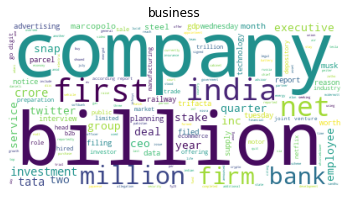

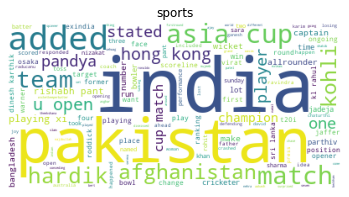

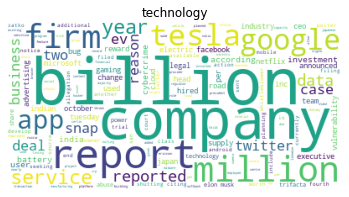

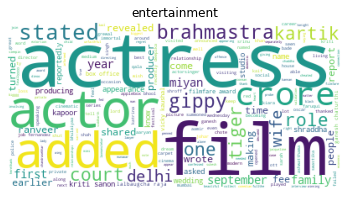

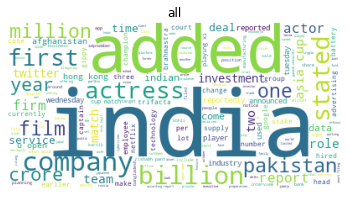

In [48]:
for col in word_counts.columns:
    img = WordCloud(background_color='white').generate(all_words_df.T[col]['all_words'])
    plt.imshow(img)
    # axis aren't very useful for a word cloud
    plt.axis('off')
    plt.title(col)
    plt.show()

In [49]:
def plot_bigrams(df, category):
    """ Accepts all words dataframe and outputs plots of top 20 bigrams and wordcloud """
    # Generate bigrams
    bigrams = list(nltk.ngrams(all_words_df.T[category]['all_words'].split(),2))
    # Take top 20
    top_20_cat_bigrams = pd.Series(bigrams).value_counts().head(20)
    
    # Plot bar chart
    top_20_cat_bigrams.sort_values().plot.barh(color='orange', width=.9, figsize=(10, 6))
    
    # Ensure only integer values for x axis
    plt.xticks(range(top_20_cat_bigrams.sort_values().max()+1))

    plt.title(f'20 Most frequently occuring {category} bigrams')
    plt.ylabel('Bigram')
    plt.xlabel('# Occurrences')

    # make the labels pretty
    ticks, _ = plt.yticks()
    labels = top_20_cat_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
    _ = plt.yticks(ticks, labels)
    plt.show()
    
    # Plot wordcloud
    data = {k[0] + ' ' + k[1]: v for k, v in top_20_cat_bigrams.to_dict().items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(category)
    plt.show()

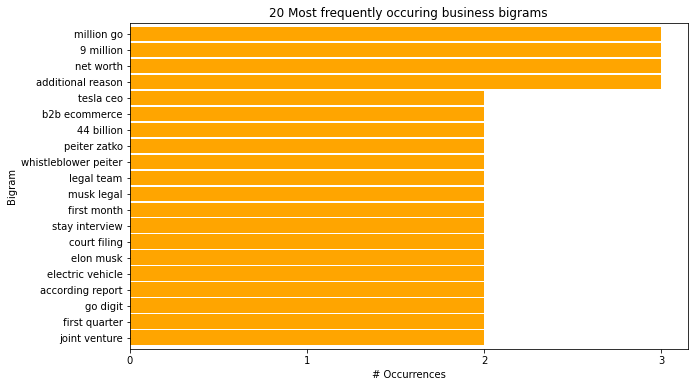

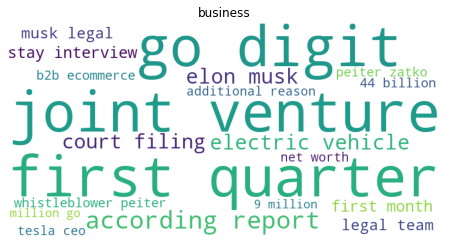

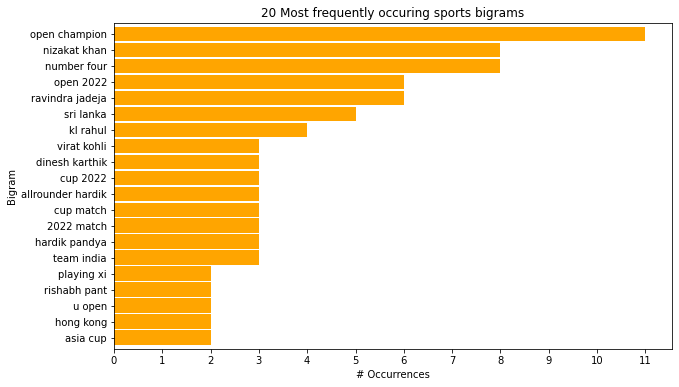

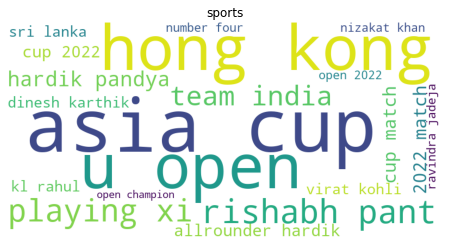

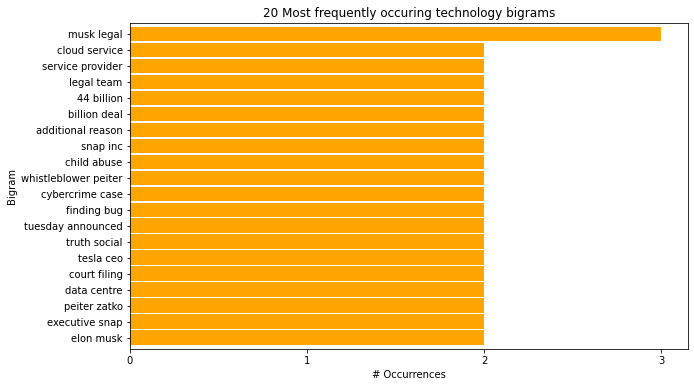

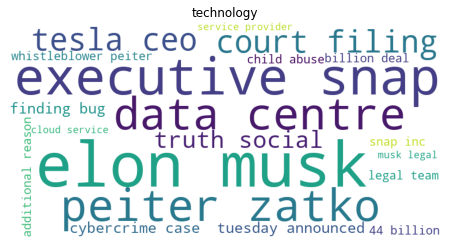

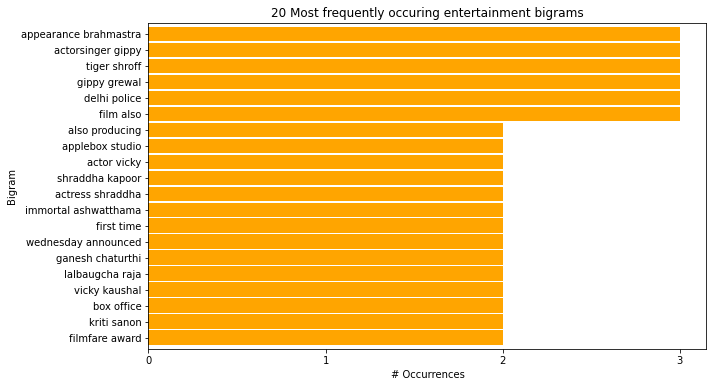

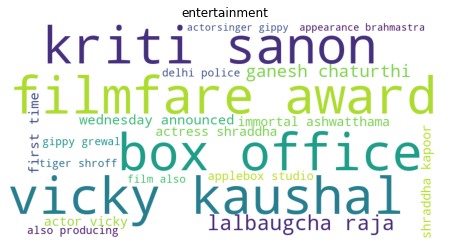

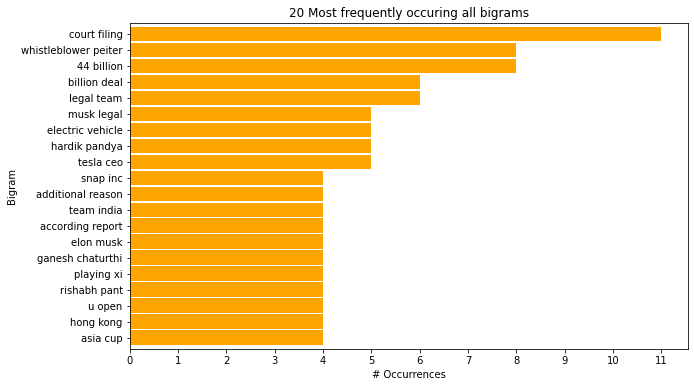

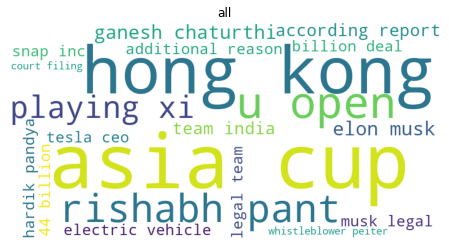

In [50]:
for col in word_counts.columns[:]:
    plot_bigrams(all_words_df, col)
    plt.show()